In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/AVP")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
import os
os.chdir("/content/gdrive/My Drive/AVP")

!ls

 baselinemodel.py		 spacy_sentiment_clf_ensemble.py
 catboost_info			 spacy_sentiment_clf.py
 catboost_model.bin		 submission.csv
 catboost_model.json		 test.csv
 classifier_10.pkl		 testfeat1.csv
 feat1Train.csv			 testfeat2.csv
 feat2Train.csv			 testfeat.csv
 meta.json			 textcat
 models				 tfidf_submission.csv
 sample_submission_i5xnIZD.csv	'tmp\\user_story_d2v.model'
 spacy_clf.py			 tokenizer
 spacy_model_bow		 train_F3WbcTw.csv
 spacy_model_cnn		 trainfeat.csv
 spacy_model_ensemble		 vocab
 spacy_sentiment_clf_bow.py


In [8]:
import  pandas as  pd
import fastai
import torch
from fastai.text import * 

torch.__version__,fastai.__version__

('1.1.0', '1.0.55')

In [9]:
train=pd.read_csv("train_F3WbcTw.csv")
train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [10]:
path=''
data_lm = TextLMDataBunch.from_csv(path, 'train_F3WbcTw.csv',text_cols="text",label_cols="sentiment")
# Classifier model data
#data_clas = TextClasDataBunch.from_csv(path,"test_tOlRoBf.csv", text_cols="text",label_cols="sentiment",vocab=data_lm.train_ds.vocab, bs=32)
data_lm.show_batch()

idx,text
0,considering that the statistics were so much dire just a few years ago . i am a 3 1 / 2 year survivor and am happy for every minute . i started xxmaj keytruda on 2 / 14 / 17 and have been stable ever since . xxmaj life is good ! i ’m thankful to be alive during a time that there has been many wonderful advances made .
1,". xxmaj you may be shown how to use injections at home . xxmaj use exactly as prescribed by your doctor . xxmaj do not self inject this medicine if you do not fully understand how to give the injection and properly dispose of used needles and syringes . xxmaj your first dose may be given in two injections at a time , each on a different place on your"
2,"take this on a weekly basis i can develop antibodies . xxmaj once again , this past week , the specialty pharmacy where i get the medication shipped from had an issue getting a hold of my insurance company . xxmaj this delayed the shipment of my xxmaj humira . i had an all - out screaming match with the insurance company and the specialty pharmacy the day before xxmaj"
3,"was going to cost the insurance $ xxunk for each section . xxup so xxup sad . \n xxmaj best of luck to you . i hope xxmaj opdivo is your magic ticket out of the cancer world . i xxup hate xxup cancer \n xxmaj sandy xxbos xxmaj paul , that is terrific that you were able to get access to xxmaj keytruda , in a relatively"
4,lobe lingula preserving lobectomy stage 2b for 1.9 cm invasive adenocarcinoma with additional 2 mm xxup ais nodule found in pathology . 03 - 05 / 2016 xxmaj sixteen weeks of adjuvant cisplatin / vinorelbine . 07 / 2016 xxmaj durvalumab adjuvant clinical trial discontinued after 1st dose knocked out thyroid . 12 / 2016 xxmaj revised to stage 1b ( due to xxup vpi ) after new guidelines for


In [0]:
train.nunique()

NameError: ignored

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


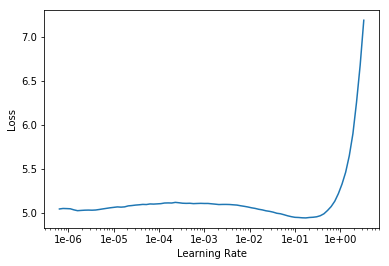

In [15]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

learn.lr_find()
learn.recorder.plot()

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
def helper_cross_validate(X,y,model,train_model=None,pass_val=False):
  kf=KFold(n_splits=10)
  score_list=[]
  for train_index,test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    if pass_val:
      model=train_model(model,X_train,y_train,X_test,y_test)
    else:
      model=train_model(model,X_train,y_train)
    pred=model.predict(X_test)
    score=evaluate(y_test,pred)
    print(score)
    score_list.append(score)
    #pd.Series(rf.feature_importances_).plot()
    #plt.show()  
    #ploting
  #plt.figure(figsize=(20,15))
  plt.bar(range(10),score_list)
  plt.show()
  
  
  #feature Importtance
  

In [16]:
learn.fit_one_cycle(1, 1e-01)
learn.save('mini_train_lm')
learn.save_encoder('mini_train_encoder')

epoch,train_loss,valid_loss,accuracy,time
0,4.627730,4.135290,0.295778,01:45


In [14]:
learn.unfreeze()
learn.fit_one_cycle(1,1e-01)
learn.save_encoder('fine_enc')


NameError: ignored

In [11]:
train1=train[:int(0.85*len(train))]
test1=train[int(0.85*len(train)):]
train1.shape,test1.shape

((4487, 4), (792, 4))

In [12]:
data_clas = TextClasDataBunch.from_df('./', train_df=train1, valid_df=test1, vocab=data_lm.train_ds.vocab, bs=32,text_cols="text",label_cols="sentiment")
data_clas.show_batch()

text,target
xxbos xxup serious xxup infections xxmaj patients treated with xxmaj remicade ® are at increased risk for developing serious infections that may lead to hospitalization or death [ see xxmaj warnings and xxmaj precautions ( 5.1 ) and xxmaj adverse xxmaj reactions ( 6.1 ) ] . xxmaj most patients who developed these infections were taking concomitant immunosuppressants such as methotrexate or corticosteroids . xxmaj remicade should be discontinued if,2
"xxbos xxmaj written xxmaj january 12 , 2018 xxmaj next : xxmaj let xxmaj us xxmaj try xxmaj home xxmaj ratings xxmaj rate this xxmaj summary xxmaj current xxmaj average xxmaj ratings xxmaj overall quality xxmaj avg : 0 / 5 xxmaj applies to topic xxmaj avg : 0 / 5 xxmaj helpful to me xxmaj avg : 0 / 5 xxmaj xxunk xxmaj total xxmaj avg xxmaj rating :",2
"xxbos xxunk : a xxmaj urine xxup dna xxmaj methylation xxmaj test for xxmaj early xxmaj detection of xxmaj aggressive xxmaj prostate xxmaj cancer xxup e. o'reilly et al , xxup xxunk xxmaj precision xxmaj oncology , xxmaj january 2019 xxmaj using xxmaj artificial xxmaj intelligence to xxmaj detect xxmaj cervical xxmaj cancer xxup nih xxmaj director 's xxmaj blog , xxmaj january 17 , 2019 xxmaj cancer surgery in",2
"xxbos ~1 hour xxmaj use : xxmaj labeled xxmaj indications xxmaj treatment of xxmaj hodgkin lymphoma xxmaj off xxmaj label xxmaj uses xxup cns tumors , anaplastic oligodendroglioma / oligoastrocytoma xxmaj data from a multicenter , randomized , controlled phase xxup iii trial in patients with anaplastic oligodendrogliomas or anaplastic xxunk supports the use of procarbazine ( xxup pcv regimen ) after radiotherapy for the treatment of this condition [",2
"xxbos 155 . xxmaj deputy xxmaj billy xxmaj kelleher asked the xxmaj minister for xxmaj business , xxmaj enterprise and xxmaj innovation the number of local enterprise office clients by county and , in the case of xxmaj dublin , by xxmaj dublin city , xxmaj dún xxmaj laoghaire - xxmaj rathdown , xxmaj fingal and south xxmaj dublin in each of the years 2016 to 2018 , in tabular",2


In [0]:
text_classifier_learner?

In [0]:
classifier = text_classifier_learner(data_clas,AWD_LSTM, drop_mult=0.5,)
classifier.load_encoder('mini_train_encoder')


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


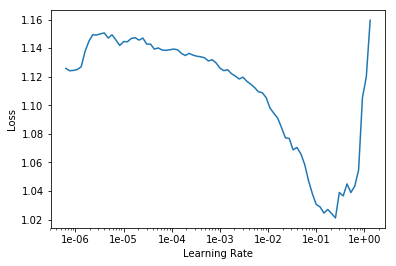

In [18]:
classifier.lr_find()
classifier.recorder.plot()

In [0]:
learn.lr_range(slice(1e-5,1e-3)), learn.lr_range(slice(1e-3))


(array([1.000000e-05, 4.641589e-05, 2.154435e-04, 1.000000e-03]),
 array([0.0001, 0.0001, 0.0001, 0.001 ]))

In [0]:
classifier.fit_one_cycle(1,slice(1e-5,1e-3),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.031112,0.987225,0.716450,01:24


In [0]:
classifier.fit(10,slice(1e-01,1e+00))

epoch,train_loss,valid_loss,accuracy,time
0,2.073713,1.177527,0.716450,01:15
1,1.102797,0.885017,0.716450,01:21
2,6.578541,3.924294,0.124459,01:17
3,1.619004,22.691992,0.159091,01:15
4,5.921760,70.858383,0.124459,01:19
5,2.583296,9.649842,0.716450,01:19
6,1.857156,12.287663,0.124459,01:23
7,3.014200,5.278899,0.159091,01:15
8,3.242100,2.227148,0.159091,01:18
9,1.280654,1.296645,0.716450,01:10


In [0]:
#classifier.fit(100,slice(1e-5,1e-3))

In [0]:
!ls

models	sample_submission_i5xnIZD.csv  test.csv  train_F3WbcTw.csv


In [0]:
test1.iloc[1,1],test1.iloc[1,3]

('I was originally dxed as adeno. Last month I had a biopsy that showed squamous. Put on Tagrisso due to T790 mutation. Now squamous and other tumors are shrinking or stable after 4 weeks, except for one tumor that has doubled in size in that same time period.  Doctor wants to do another needle biopsy before jumping into a different treatment because it isn’t clear what this tumor is. Not thrilled about this but the rapid growth is a concern. Staying on Tagrisso for now. Any thoughts?',
 1)

In [0]:
classifier.predict(test1.iloc[1,1])


(Category 2, tensor(2), tensor([0.0515, 0.0038, 0.9447]))

In [0]:
classifier.export(file="classifier_10.pkl")

In [0]:
pred=test1.text.apply(lambda x:classifier.predict(x))

In [0]:
pred

3431    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3432    (2, tensor(2), [tensor(0.0515), tensor(0.0038)...
3433    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3434    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3435    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3436    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3437    (2, tensor(2), [tensor(0.0514), tensor(0.0038)...
3438    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3439    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3440    (2, tensor(2), [tensor(0.0514), tensor(0.0038)...
3441    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3442    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3443    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3444    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3445    (2, tensor(2), [tensor(0.0516), tensor(0.0038)...
3446    (2, tensor(2), [tensor(0.0498), tensor(0.0038)...
3447    (2, tensor(2), [tensor(0.0512), tensor(0.0038)...
3448    (2, te

In [0]:
c=pred.iloc[0][0]
c.data

tensor(2)

In [0]:
classifier = text_classifier_learner(data_clas,AWD_LSTM, drop_mult=0.5,pretrained=False)
classifier.load_encoder('fine_enc')


In [0]:
from fastai.callbacks import EarlyStoppingCallback
classifier.fit(10,1e-01,callbacks=[EarlyStoppingCallback(classifier)],)

epoch,train_loss,valid_loss,accuracy,time
0,0.796099,0.807547,0.713384,01:13


Epoch 1: early stopping


In [0]:
URLs.WT103_BWD

'https://s3.amazonaws.com/fast-ai-modelzoo/wt103-bwd'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


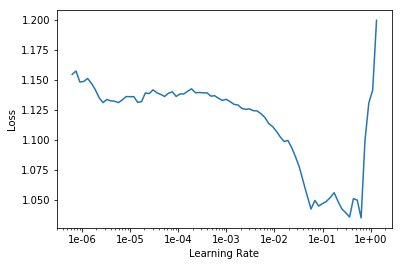

In [22]:
learn1 = text_classifier_learner(data_clas, AWD_LSTM ,drop_mult=0.3)
learn1.load_encoder('mini_train_encoder')

# find and plot learning rate
learn1.lr_find()
learn1.recorder.plot()


In [23]:
learn1.fit_one_cycle(1, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.771013,0.733226,0.713384,01:26


In [24]:
learn1.fit_one_cycle(1, 1e-1)


epoch,train_loss,valid_loss,accuracy,time
0,0.767602,0.745108,0.713384,01:21


In [25]:
learn1.freeze_to(-2)
learn1.fit_one_cycle(1, slice(5e-3/2., 5e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.745445,0.734388,0.710859,01:27


In [26]:
learn1.freeze_to(-3)
learn1.fit_one_cycle(1, slice(5e-3/2., 5e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.712811,0.706781,0.719697,01:57


In [27]:
learn1.unfreeze()
learn1.fit_one_cycle(1, slice(5e-3/2., 5e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.699539,0.679526,0.726010,02:14


In [0]:
from fastai.callbacks import *
learn1.fit(100,callbacks=[EarlyStoppingCallback(learn1)])

epoch,train_loss,valid_loss,accuracy,time
0,0.773225,0.894781,0.710859,02:25


Epoch 1: early stopping


In [0]:
a=np.random.choice([0,1,2],test.shape[0],[0.3,0.2,0.5])

In [0]:
pred=test1.text.apply(lambda x:learn1.predict(x)[0])